# Insurance Claims- Fraud Detection Project

## Problem statement 

### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

## The Data

Loading the data by reading the csv file as data frame

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

## Exploratory Data Analysis

In [3]:
df.shape

(1000, 40)

we have 1000 rows and 40 columns

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

RangeIndex 1000, 0 to 999, total 40 columns all columns has 1000 non null values except _c39 column it has all null values and 2 columns has float64, 17 columns has int64 and 21 columns has object dtype

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

no null values in columns except _c39 column, _c39 column has all null values we can drop _c39 column

In [9]:
df=df.drop('_c39',axis=1)

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


###### Observation
1.policy_deductable,umbrella_limit,number_of_vehicles_involved,witnesses,,injury_claim,property_claim columns are have mean values is more than 50th percentile(median)

2.insured_zip,capital-gains columns have zero in 50th percentile(median)

3.months_as_customer,policy_number,policy_annual_premium,insured_zip,capital-gains,total_claim_amount,injury_claim, property_claim,vehicle_claim columns has large difference in 75th percentile and max value

<AxesSubplot:>

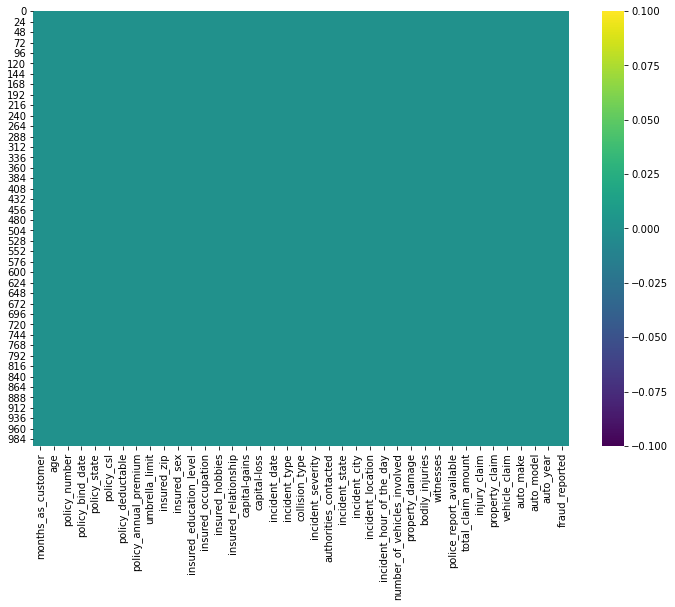

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis')

No null values in data frames

In [12]:
df['fraud_reported']=df['fraud_reported'].apply(lambda x: 1 if x == 'Y' else 0)

### Features

In [13]:
df['policy_number']

0      521585
1      342868
2      687698
3      227811
4      367455
        ...  
995    941851
996    186934
997    918516
998    533940
999    556080
Name: policy_number, Length: 1000, dtype: int64

Policy number is unique for each applicant so it has different numbers so we can drop this column

In [14]:
df['policy_bind_date']

0      17-10-2014
1      27-06-2006
2      06-09-2000
3      25-05-1990
4      06-06-2014
          ...    
995    16-07-1991
996    05-01-2014
997    17-02-2003
998    18-11-2011
999    11-11-1996
Name: policy_bind_date, Length: 1000, dtype: object

policy_bind_date is date that is not having any impact on target varible so we can drop this column also

In [15]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

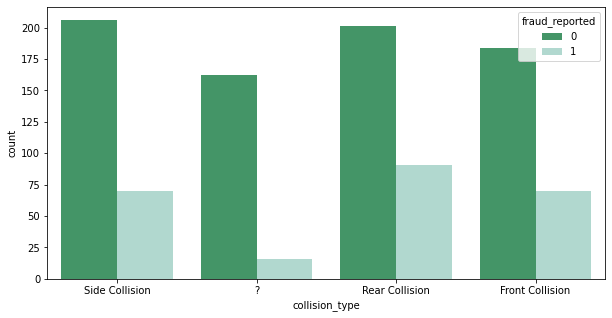

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(df['collision_type'],hue=df['fraud_reported'],palette='BuGn_r')
df['collision_type'].value_counts()

we have some columns with ? it means those are not have any values and these is not having any impact on our target variable so we can drop this column also

In [17]:
df['incident_location']

0           9935 4th Drive
1             6608 MLK Hwy
2        7121 Francis Lane
3         6956 Maple Drive
4             3041 3rd Ave
              ...         
995     6045 Andromedia St
996       3092 Texas Drive
997            7629 5th St
998          6128 Elm Lane
999    1416 Cherokee Ridge
Name: incident_location, Length: 1000, dtype: object

incident_location column has only location so this is also not having any impact on our tareget variable so we can delete this column also

In [18]:
df.drop(['policy_number','policy_bind_date','collision_type','incident_location'],axis=1,inplace=True)

In [19]:
df['months_as_customer'].unique()

array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,   2, 117, 242, 440,  2

<AxesSubplot:ylabel='months_as_customer'>

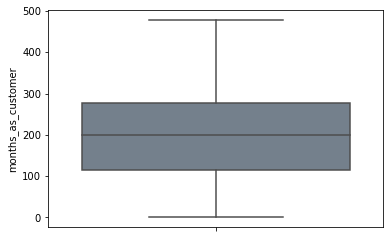

In [20]:
sns.boxplot(y=df['months_as_customer'],color='slategray')

we don't have ouliers in 'months_as_customer' column

<AxesSubplot:xlabel='age', ylabel='Count'>

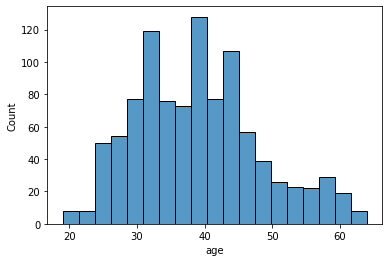

In [21]:
sns.histplot(df['age'])

most of the applicant are between 30 to 45 age 

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

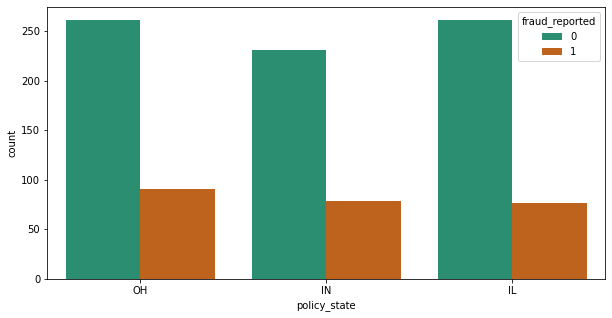

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(df['policy_state'],hue=df['fraud_reported'],palette='Dark2')
df['policy_state'].value_counts()

In [23]:
policy_state=pd.get_dummies(df['policy_state'],drop_first=True,prefix='policy_state')
policy_state.head()

,policy_state_IN,policy_state_OH
0,0,1
1,1,0
2,0,1
3,0,0
4,0,0


In [24]:
df.shape

(1000, 35)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

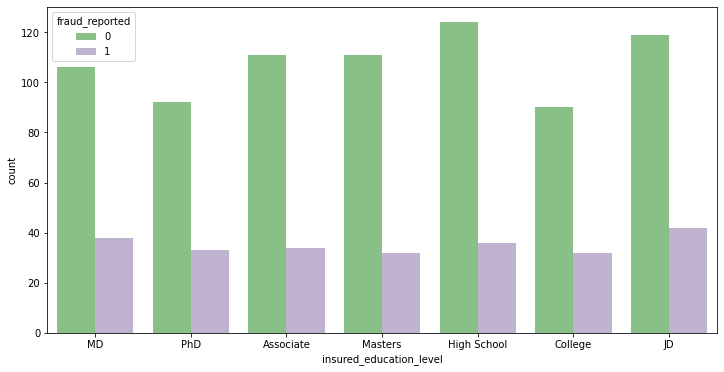

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(df['insured_education_level'],hue=df['fraud_reported'],palette='Accent')

<AxesSubplot:xlabel='auto_year', ylabel='total_claim_amount'>

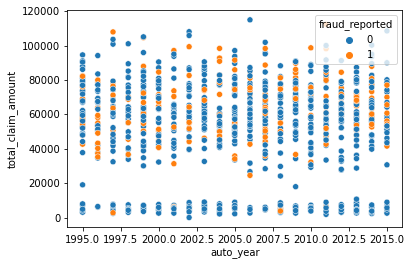

In [26]:
sns.scatterplot(x=df['auto_year'],y=df['total_claim_amount'],hue=df['fraud_reported'])

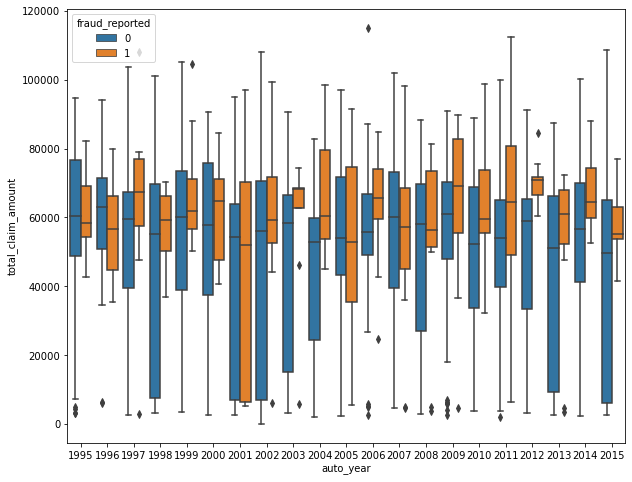

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['auto_year'],y=df['total_claim_amount'],hue=df['fraud_reported'])
plt.show()

we have some outliers in the total-claim-amount and auto_year

<AxesSubplot:xlabel='vehicle_claim', ylabel='total_claim_amount'>

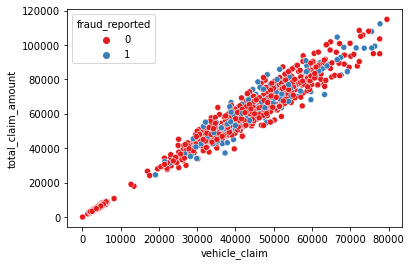

In [28]:
sns.scatterplot(x=df['vehicle_claim'],y=df['total_claim_amount'],hue=df['fraud_reported'],palette='Set1')

we have most are fraud application in vechicle claims 

<AxesSubplot:xlabel='property_claim', ylabel='total_claim_amount'>

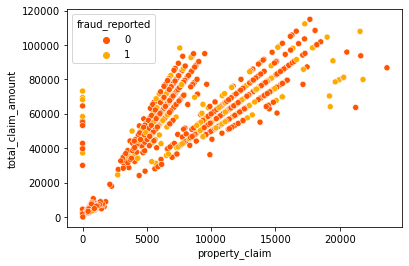

In [29]:
sns.scatterplot(x=df['property_claim'],y=df['total_claim_amount'],hue=df['fraud_reported'],palette='autumn')

<AxesSubplot:xlabel='injury_claim', ylabel='total_claim_amount'>

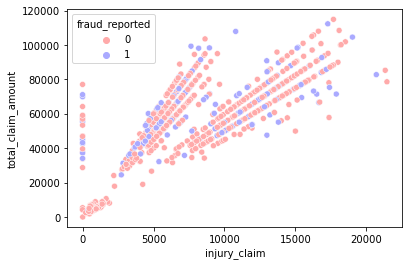

In [30]:
sns.scatterplot(x=df['injury_claim'],y=df['total_claim_amount'],hue=df['fraud_reported'],palette='bwr_r')

Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

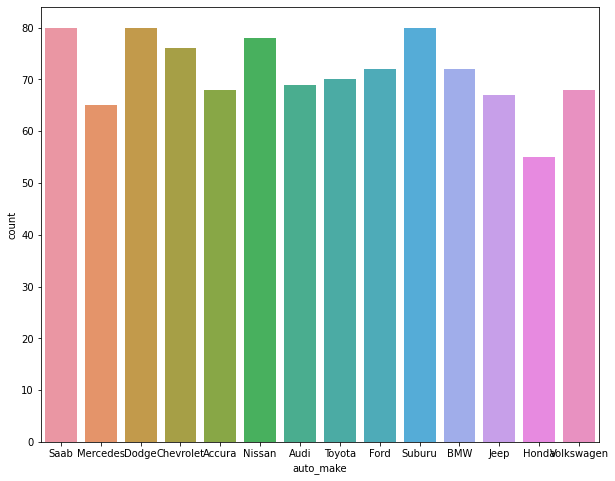

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(df['auto_make'])
df['auto_make'].value_counts()

auto_model is about vehicle companies

In [32]:
df.drop('auto_model',axis=1,inplace=True)

In [33]:
df['witnesses'].unique()

array([2, 0, 3, 1], dtype=int64)

<AxesSubplot:xlabel='witnesses', ylabel='count'>

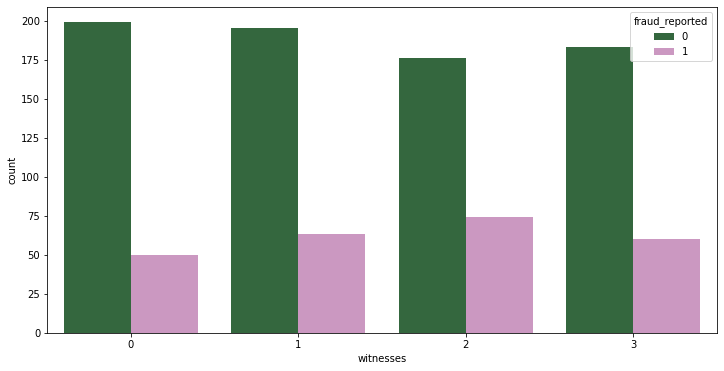

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['witnesses'],hue=df['fraud_reported'],palette='cubehelix')

we have 4 witnesses types 

In [35]:
df.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.027448,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554,0.051839


<AxesSubplot:>

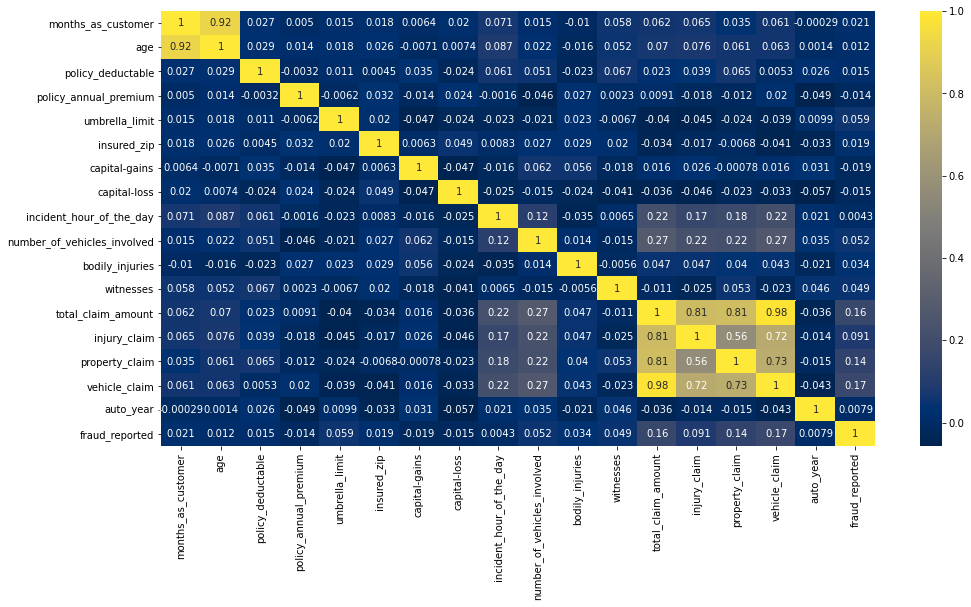

In [36]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap='cividis',annot=True)

In [37]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

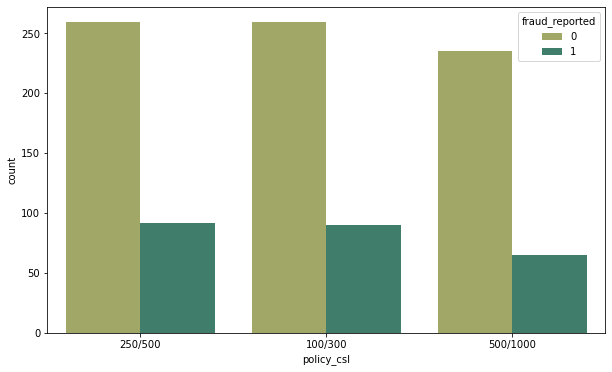

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df['policy_csl'],hue=df['fraud_reported'],palette='gist_earth_r')
df['policy_csl'].value_counts()

policy_csl has 3 types 250/500,100/300,500/1000, all most it has same count

In [39]:
df.drop(['policy_csl'],axis=1,inplace=True)

In [40]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [41]:
df.drop('property_damage',axis=1,inplace=True)

<AxesSubplot:xlabel='auto_year', ylabel='count'>

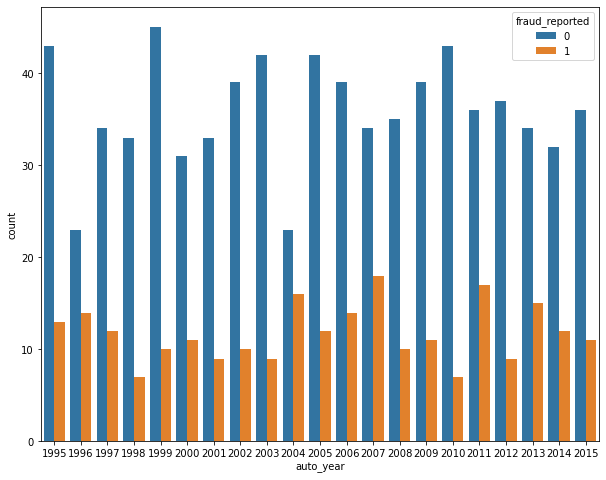

In [42]:
plt.figure(figsize=(10,8))
sns.countplot(df['auto_year'],hue=df['fraud_reported'])

In [43]:
df=df.drop('auto_year',axis=1)

In [44]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

<AxesSubplot:xlabel='incident_city', ylabel='count'>

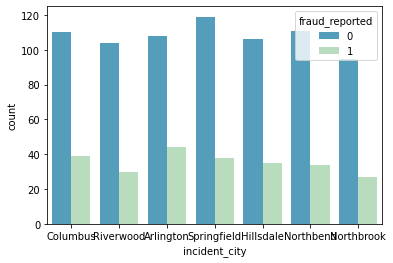

In [45]:
sns.countplot(df['incident_city'],hue=df['fraud_reported'],palette='GnBu_r')

In [46]:
df=pd.concat([df,policy_state],axis=1)
df.drop('policy_state',axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,policy_state_IN,policy_state_OH
0,328,48,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Major Damage,Police,SC,Columbus,5,1,1,2,YES,71610,6510,13020,52080,Saab,1,0,1
1,228,42,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Minor Damage,Police,VA,Riverwood,8,1,0,0,?,5070,780,780,3510,Mercedes,1,1,0
2,134,29,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Minor Damage,Police,NY,Columbus,7,3,2,3,NO,34650,7700,3850,23100,Dodge,0,0,1
3,256,41,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Major Damage,Police,OH,Arlington,5,1,1,2,NO,63400,6340,6340,50720,Chevrolet,1,0,0
4,228,44,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Minor Damage,None,NY,Arlington,20,1,0,1,NO,6500,1300,650,4550,Accura,0,0,0


In [47]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

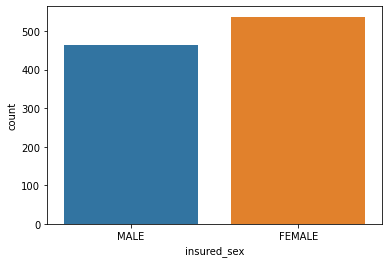

In [48]:
sns.countplot(df['insured_sex'])

In [49]:
insured_sex=pd.get_dummies(df['insured_sex'],drop_first=True,prefix='insured_sex')
df=pd.concat([df,insured_sex],axis=1)
df.drop('insured_sex',axis=1,inplace=True)

In [50]:
df.drop('insured_zip',axis=1,inplace=True)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

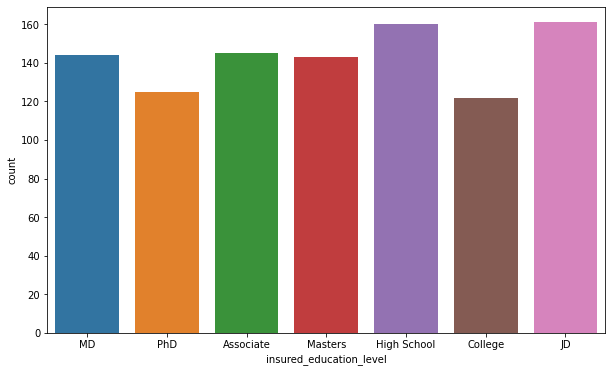

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(df['insured_education_level'])

In [52]:
insured_education_level=pd.get_dummies(df['insured_education_level'],drop_first=True,prefix='insured_education_level')
df=pd.concat([df,insured_education_level],axis=1)
df.drop('insured_education_level',axis=1,inplace=True)

In [53]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

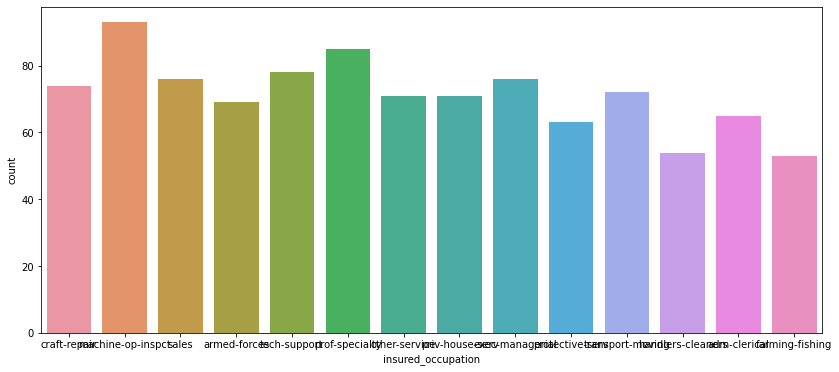

In [54]:
plt.figure(figsize=(14,6))
sns.countplot(df['insured_occupation'])

In [55]:
insured_occupation=pd.get_dummies(df['insured_occupation'],drop_first=True,prefix='insured_occupation')
df=pd.concat([df,insured_occupation],axis=1)
df.drop('insured_occupation',axis=1,inplace=True)

In [56]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

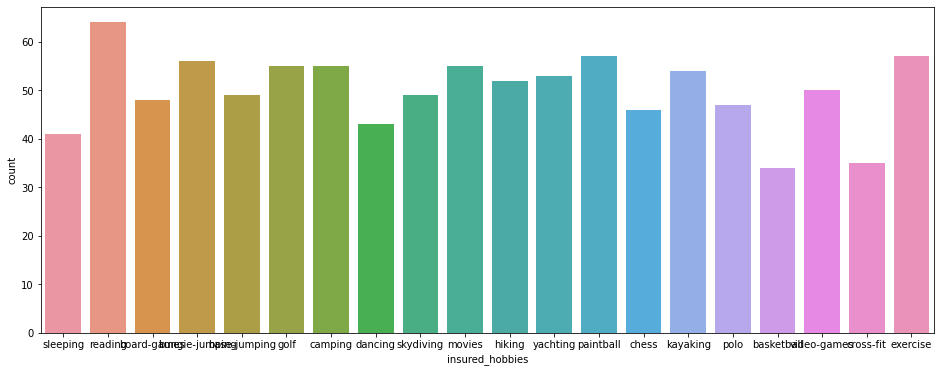

In [57]:
plt.figure(figsize=(16,6))
sns.countplot(df['insured_hobbies'])

In [58]:
insured_hobbies=pd.get_dummies(df['insured_hobbies'],drop_first=True,prefix='insured_hobbies')
df=pd.concat([df,insured_hobbies],axis=1)
df.drop('insured_hobbies',axis=1,inplace=True)

In [59]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

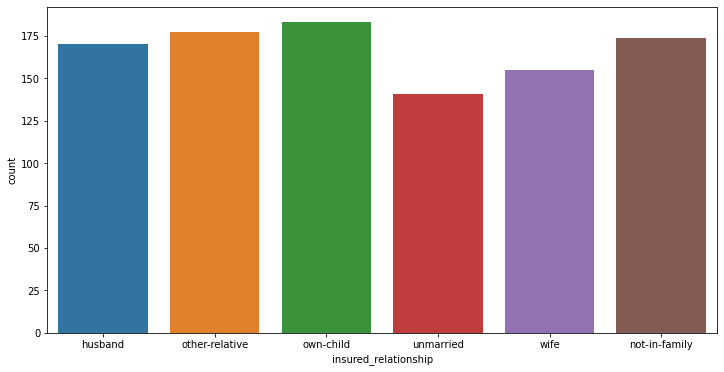

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(df['insured_relationship'])

In [61]:
insured_relationship=pd.get_dummies(df['insured_relationship'],drop_first=True,prefix='insured_relationship')
df=pd.concat([df,insured_relationship],axis=1)
df.drop('insured_relationship',axis=1,inplace=True)

In [62]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

<AxesSubplot:xlabel='incident_type', ylabel='count'>

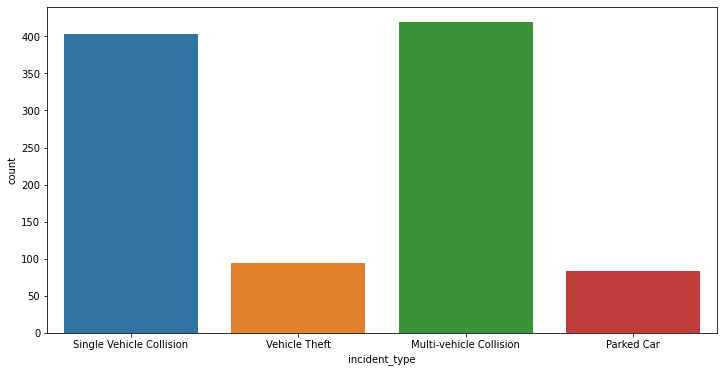

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(df['incident_type'])

In [64]:
incident_type=pd.get_dummies(df['incident_type'],drop_first=True,prefix='incident_type')
df=pd.concat([df,incident_type],axis=1)
df.drop('incident_type',axis=1,inplace=True)

In [65]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

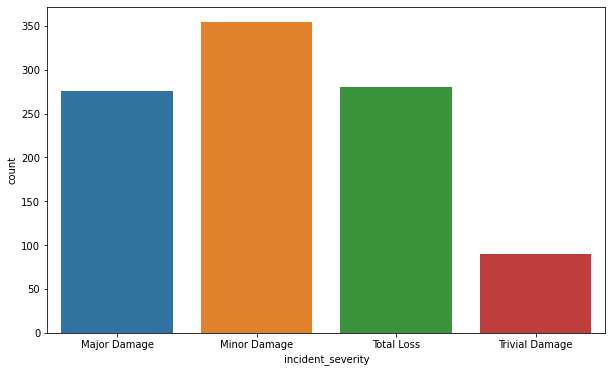

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(df['incident_severity'])

In [67]:
incident_severity=pd.get_dummies(df['incident_severity'],drop_first=True,prefix='incident_severity')
df=pd.concat([df,incident_severity],axis=1)
df.drop('incident_severity',axis=1,inplace=True)

In [68]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

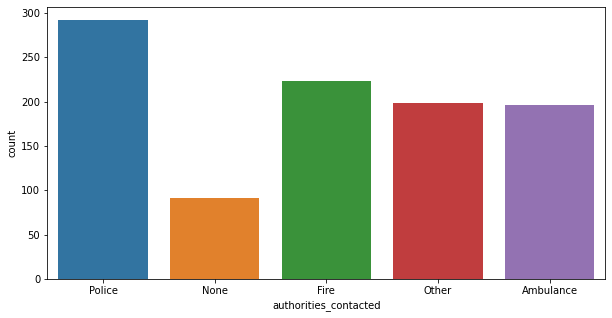

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(df['authorities_contacted'])

In [70]:
authorities_contacted=pd.get_dummies(df['authorities_contacted'],drop_first=True,prefix='authorities_contacted')
df=pd.concat([df,authorities_contacted],axis=1)
df.drop('authorities_contacted',axis=1,inplace=True)


In [71]:
df.drop(['incident_state','incident_city','auto_make'],axis=1,inplace=True)

In [72]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [73]:
df=df.drop(['incident_date','police_report_available'],axis=1)

In [74]:
df.shape

(1000, 72)

In [75]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_state_IN,policy_state_OH,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0


### Splitting the Data into Training and Testing Sets

In [76]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

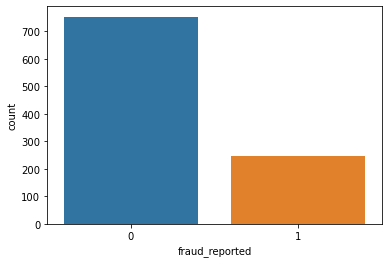

In [77]:
sns.countplot(df['fraud_reported'])
plt.show()

### Scalings

In [78]:
scaler=StandardScaler()

In [79]:
x_scl=scaler.fit_transform(x)
x_scl

array([[ 1.07813958,  0.99083647, -0.22238259, ..., -0.31640166,
        -0.49687301,  1.55713119],
       [ 0.2089946 ,  0.33407345,  1.41278352, ..., -0.31640166,
        -0.49687301,  1.55713119],
       [-0.60800168, -1.08891308,  1.41278352, ..., -0.31640166,
        -0.49687301,  1.55713119],
       ...,
       [-0.64276748, -0.54161057, -1.03996564, ..., -0.31640166,
        -0.49687301,  1.55713119],
       [ 2.20802805,  2.52328351,  1.41278352, ..., -0.31640166,
         2.01258666, -0.64220665],
       [ 2.19064515,  2.3043625 , -0.22238259, ..., -0.31640166,
        -0.49687301,  1.55713119]])

In [80]:
x_scl=pd.DataFrame(x_scl,columns=x.columns)
x_scl.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_state_IN,policy_state_OH,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,0.714257,-0.189283,1.165505,0.749653,-0.670280,1.356801,1.076953,-0.372763,-0.436436,-0.438058,2.438123,-0.408486,-0.377964,-0.272239,3.537444,-0.286794,-0.236572,-0.238919,-0.320212,-0.276453,-0.276453,-0.304789,-0.259299,-0.286794,-0.290859,-0.278543,-0.187608,-0.224544,-0.243561,-0.241249,-0.219586,-0.190445,-0.211972,-0.245856,-0.241249,-0.234206,-0.238919,-0.241249,-0.245856,-0.222076,-0.261488,-0.226991,4.836346,-0.229416,-0.236572,-0.45897,-0.463753,-0.473276,-0.405147,-0.42829,-0.302825,1.217123,-0.322107,-0.740262,-0.62361,-0.314485,-0.535725,-0.316402,-0.496873,1.557131
1,0.208995,0.334073,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,-1.823346,1.491914,-0.737028,1.076953,-0.372763,-0.436436,-0.438058,2.438123,-0.408486,-0.377964,-0.272239,-0.282690,-0.286794,-0.236572,-0.238919,3.122929,-0.276453,-0.276453,-0.304789,-0.259299,-0.286794,-0.290859,-0.278543,-0.187608,-0.224544,-0.243561,-0.241249,-0.219586,-0.190445,-0.211972,-0.245856,-0.241249,-0.234206,-0.238919,-0.241249,-0.245856,-0.222076,3.824265,-0.226991,-0.206768,-0.229416,-0.236572,-0.45897,2.156320,-0.473276,-0.405147,-0.42829,-0.302825,-0.821609,3.104561,1.350873,-0.62361,-0.314485,-0.535725,-0.316402,-0.496873,1.557131
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,-0.686362,0.054644,-0.736072,-0.785565,-0.670280,1.356801,-0.928546,-0.372763,-0.436436,-0.438058,-0.410152,-0.408486,2.645751,-0.272239,-0.282690,-0.286794,-0.236572,-0.238919,-0.320212,-0.276453,-0.276453,-0.304789,-0.259299,3.486817,-0.290859,-0.278543,-0.187608,4.453463,-0.243561,-0.241249,-0.219586,-0.190445,-0.211972,-0.245856,-0.241249,-0.234206,-0.238919,-0.241249,-0.245856,-0.222076,-0.261488,-0.226991,-0.206768,-0.229416,-0.236572,-0.45897,-0.463753,2.112932,-0.405147,-0.42829,-0.302825,-0.821609,-0.322107,1.350873,-0.62361,-0.314485,-0.535725,-0.316402,-0.496873,1.557131
3,0.452355,0.224613,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.956261,

### PCA

In [81]:
pca=PCA(svd_solver='randomized', random_state=30)
pca.fit(x_scl)

PCA(random_state=30, svd_solver='randomized')

In [82]:
pca.components_

array([[-4.11086169e-02, -4.47926139e-02, -1.15923717e-02, ...,
         2.90530446e-01, -1.20490367e-01,  8.73041410e-02],
       [ 6.50530204e-01,  6.49291365e-01,  5.13419362e-02, ...,
         3.26326625e-02, -2.85977062e-02,  2.20192628e-02],
       [ 3.22893650e-02,  3.23961757e-02,  8.98238695e-02, ...,
        -4.08915297e-02,  1.00353025e-02,  8.86339198e-02],
       ...,
       [ 2.58327900e-02, -1.51588490e-02, -3.55286948e-03, ...,
        -1.53968824e-02, -2.35839871e-02, -1.34977001e-02],
       [ 2.94876183e-02, -2.90661778e-02,  1.57031886e-03, ...,
        -3.13984381e-02, -1.57044166e-03, -1.78095405e-02],
       [-2.11930272e-17,  1.65864849e-16, -5.99031299e-16, ...,
        -2.15105711e-16, -4.09394740e-16, -4.37150316e-16]])

In [83]:
# Creating a dataframe of Features and first 2 principal components.

colnames = list(x_scl.columns)
pca_df = pd.DataFrame({'Feature':colnames, 'PC1':pca.components_[0],'PC2':pca.components_[1]})
pca_df.head()

,Feature,PC1,PC2
0,months_as_customer,-0.041109,0.650530
1,age,-0.044793,0.649291
2,policy_deductable,-0.011592,0.051342
3,policy_annual_premium,-0.007835,0.015846
4,umbrella_limit,0.022450,0.049742


In [84]:
# Looking at the variance ratios.

pca.explained_variance_ratio_

array([7.64749614e-02, 2.88730857e-02, 2.59380036e-02, 2.33829784e-02,
       2.27030315e-02, 2.21281439e-02, 2.12551849e-02, 2.06538910e-02,
       2.06322000e-02, 2.03584786e-02, 1.98158449e-02, 1.94406863e-02,
       1.89465462e-02, 1.88065442e-02, 1.86098304e-02, 1.81198285e-02,
       1.79134931e-02, 1.75263993e-02, 1.74865449e-02, 1.71789352e-02,
       1.70214725e-02, 1.69204712e-02, 1.68489642e-02, 1.62495261e-02,
       1.59570969e-02, 1.58727558e-02, 1.57285414e-02, 1.52315490e-02,
       1.51848023e-02, 1.50099601e-02, 1.48981624e-02, 1.46942838e-02,
       1.45268366e-02, 1.43123112e-02, 1.41045745e-02, 1.40390357e-02,
       1.37650164e-02, 1.35414522e-02, 1.33251761e-02, 1.31333231e-02,
       1.29832625e-02, 1.27716112e-02, 1.26525653e-02, 1.24833472e-02,
       1.21393988e-02, 1.19991718e-02, 1.18378559e-02, 1.17824116e-02,
       1.16764082e-02, 1.12125404e-02, 1.10273918e-02, 1.07982679e-02,
       1.06376173e-02, 1.02238612e-02, 1.00438044e-02, 9.64023408e-03,
      

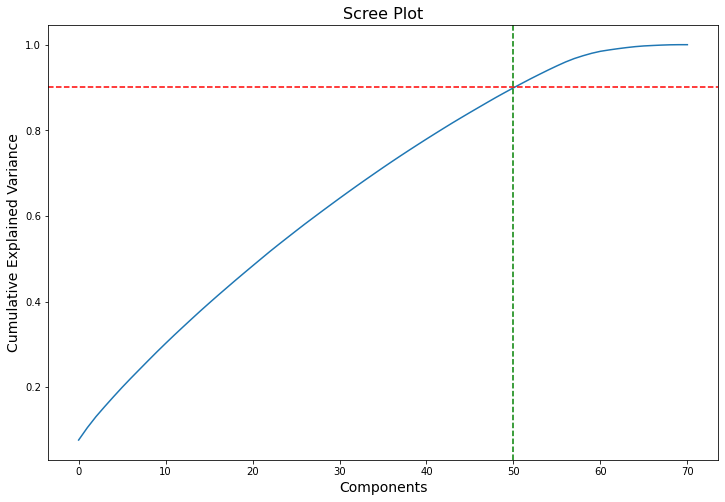

In [85]:
# Making the 'Screeplot' - plotting the cummulative variance against the number of components.

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components', fontsize = 14)
plt.ylabel('Cumulative Explained Variance', fontsize = 14)
plt.title('Scree Plot', fontsize=16)
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axvline(x=50, color='g', linestyle='--')
plt.show()

In [86]:
# Using incremental PCA for selecting the components.

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [87]:
# Performing fit_transform on dataset.

df_comp = pca_final.fit_transform(x_scl)
df_comp.shape

(1000, 50)

In [88]:
df_comp=pd.DataFrame(df_comp)
df_comp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.154614,1.804263,-1.108662,1.806146,-0.565878,1.276552,-0.390779,0.288644,-0.850642,-0.547632,-0.482897,-0.867172,-0.221632,1.304127,-1.105828,-0.279417,-0.472792,1.046159,2.002305,-1.559529,-0.116361,-1.520723,0.847467,0.557556,1.765458,0.539291,-0.678974,1.050177,0.838820,-0.576723,0.232814,-1.110918,0.935286,-0.749230,0.702915,-0.491141,-0.868819,-0.383346,-0.899106,2.205392,1.773375,0.129898,2.744296,-0.848905,-0.337802,-1.598551,-0.772935,-0.151564,0.188913,0.528908
1,-3.768528,0.980796,0.377958,-1.217192,0.558707,2.079521,0.701850,-2.113661,-0.353266,2.852874,0.723118,0.595354,1.741769,-1.033452,-1.098801,-0.302264,0.243746,-0.992205,2.547885,-0.648963,1.494056,-0.822719,-0.241462,1.396243,0.496028,-0.190958,0.075732,-1.489641,0.322531,0.057384,0.883730,0.074236,0.495134,0.675617,-0.057661,-0.551810,0.432734,-1.168485,-0.481297,0.501812,0.771101,-0.179756,-0.260937,-0.575976,1.316829,1.675696,-1.585873,-0.554017,-0.999052,-0.643807
2,-1.032331,-0.130506,1.279330,2.115905,1.196150,1.191905,0.428446,0.521027,-1.595047,-1.156523,3.390818,-1.353493,1.010814,-0.636792,-2.474258,-0.577019,0.645206,-0.710026,-0.670612,1.667551,-0.051807,-1.861087,1.252563,-1.795693,0.396704,-0.949550,0.405959,0.661234,-0.304393,-0.235210,-0.657959,-0.225719,0.315531,0.848514,0.369429,0.711392,0.514716,2.049018,-1.275844,-1.320533,-1.416764,0.849049,0.002109,-0.326248,-1.440002,0.314001,-0.974036,0.799242,0.555447,-0.462299
3,0.423581,1.007756,-1.173357,0.650882,0.292813,1.811952,0.094323,2.827991,-1.597654,0.422448,1.604440,-1.971877,0.016189,-1.497382,-0.888213,0.929883,-0.767046,-2.164061,-0.091157,1.991122,0.991744,-0.568712,1.247785,-1.063701,-0.768871,-0.790404,-0.198454,-0.042403,-1.633692,0.046325,0.318388,0.186128,0.854681,-1.635957,-0.314186,0.749121,-0.484699,1.054898,0.433356,-0.465352,1.115722,1.269599,-0.306921,-0.440292,-1.783713,0.622031,-1.294391,0.526598,0.056499,-1.399990
4,-4.250551,1.735227,0.119172,-0.178829,0.508513,0.449998,1.068938,1.993629,-0.876315,1.045362,1.651260,0.694982,2.125703,-0.319549,-0.578992,-1.560306,-0.070246,-1.642767,-0.900891,2.234201,-1.201287,-0.353905,1.179845,-0.393365,0.922416,-0.706324,-0.934511,-0.614779,-1.162838,-0.356411,0.624292,-0.132027,0.181010,0.069336,-1.540897,-0.186342,0.853811,2.285436,0.692491,0.051483,-0.259392,0.140837,-0.022096,-1.373862,-1.929414,0.034979,0.426005,0.710123,1.535624,0.105546


## Resampling 

In [89]:
y.shape

(1000,)

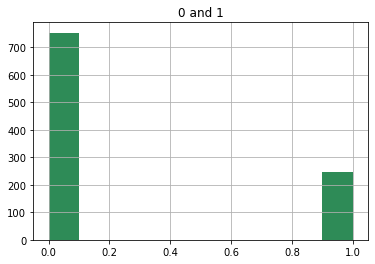

0    753
1    247
Name: fraud_reported, dtype: int64

In [90]:
y.hist(grid=True,color='seagreen')
plt.title("0 and 1")
plt.show()
y.value_counts()

we have imbalnce in given data so we have to resample it

In [91]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler()
x_res,y_res=us.fit_resample(df_comp,y)

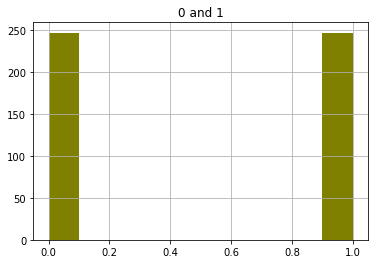

In [92]:
y_res.hist(grid=True,color='olive')
plt.title("0 and 1")
plt.show()

In [93]:
x_res.shape,y_res.shape

((494, 50), (494,))

## Finding best random state

In [94]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.30,random_state=i)
    le=LogisticRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is",maxAccu,"on random_state", maxRS)

Best accuracy score is 0.7718120805369127 on random_state 13


### train_test_split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.30,random_state=13)

In [96]:
x_train.shape

(345, 50)

In [97]:
x_test.shape

(149, 50)

In [98]:
y_train.shape

(345,)

In [99]:
y_train.shape

(345,)

## Machine Learning Algorithms

In [100]:
model=[LogisticRegression(),DecisionTreeClassifier(),
       RandomForestClassifier(),SVC(),AdaBoostClassifier(),
       GradientBoostingClassifier(),KNeighborsClassifier() ]

In [101]:
for m in model:
    print('model name:',m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("accuracy score:",accuracy_score(y_test,pred))
    print("confusion matrix:",confusion_matrix(y_test,pred))
    print("classification report:",classification_report(y_test,pred))
    print("roc_auc_score:",roc_auc_score(y_test,m.predict(x_test)))
    print("Cross validation score:")
    print()
    scr=cross_val_score(m,x,y,cv=5)
    print('cross validation score',scr.mean())
    print('------------------------------------------------------------------------------')

model name: LogisticRegression()
accuracy score: 0.7718120805369127
confusion matrix: [[58 19]
 [15 57]]
classification report:               precision    recall  f1-score   support

           0       0.79      0.75      0.77        77
           1       0.75      0.79      0.77        72

    accuracy                           0.77       149
   macro avg       0.77      0.77      0.77       149
weighted avg       0.77      0.77      0.77       149

roc_auc_score: 0.7724567099567099
Cross validation score:

cross validation score 0.749
------------------------------------------------------------------------------
model name: DecisionTreeClassifier()
accuracy score: 0.6375838926174496
confusion matrix: [[50 27]
 [27 45]]
classification report:               precision    recall  f1-score   support

           0       0.65      0.65      0.65        77
           1       0.62      0.62      0.62        72

    accuracy                           0.64       149
   macro avg       0.64     

After applying the different machine learning algorithms we got LogisticRegression best algorithm for this

## Hyper parameter Tuning 

In [102]:
from sklearn.model_selection import GridSearchCV

In [147]:
lr = LogisticRegression()

parameters = {'penalty':['l1','elasticnet','none'],'fit_intercept':['bool',True],'intercept_scaling':[1,2,3,4,5],
             'solver':['newton-cg','liblinear','saga'],'max_iter':[100,200,300],
             'multi_class':['ovr','multinomial']}

gcv = GridSearchCV(lr,parameters,verbose=3,n_jobs=-1)
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'fit_intercept': ['bool', True],
                         'intercept_scaling': [1, 2, 3, 4, 5],
                         'max_iter': [100, 200, 300],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'liblinear', 'saga']},
             verbose=3)

In [148]:
gcv.best_params_

{'fit_intercept': 'bool',
 'intercept_scaling': 2,
 'max_iter': 100,
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [149]:
gcv_pred=gcv.predict(x_test)

In [150]:
print("accuracy score:",accuracy_score(y_test,gcv_pred))
print("roc_auc_score:",roc_auc_score(y_test,gcv_pred))

accuracy score: 0.7718120805369127
roc_auc_score: 0.772005772005772


In [151]:
logit_roc_auc1=roc_auc_score(y_test,gcv_pred)
fpr,tpr,thresholds=roc_curve(y_test,gcv.predict_proba(x_test)[:,1])

In [152]:
fpr

array([0.        , 0.        , 0.        , 0.01298701, 0.01298701,
       0.02597403, 0.02597403, 0.03896104, 0.03896104, 0.09090909,
       0.09090909, 0.1038961 , 0.1038961 , 0.12987013, 0.12987013,
       0.14285714, 0.14285714, 0.15584416, 0.15584416, 0.16883117,
       0.16883117, 0.18181818, 0.18181818, 0.22077922, 0.22077922,
       0.23376623, 0.23376623, 0.28571429, 0.28571429, 0.35064935,
       0.35064935, 0.38961039, 0.38961039, 0.41558442, 0.41558442,
       0.50649351, 0.50649351, 0.54545455, 0.54545455, 0.62337662,
       0.62337662, 0.76623377, 0.76623377, 0.81818182, 0.81818182,
       0.84415584, 0.84415584, 0.94805195, 0.94805195, 1.        ])

In [153]:
tpr

array([0.        , 0.01388889, 0.26388889, 0.26388889, 0.40277778,
       0.40277778, 0.48611111, 0.48611111, 0.51388889, 0.51388889,
       0.55555556, 0.55555556, 0.59722222, 0.59722222, 0.66666667,
       0.66666667, 0.68055556, 0.68055556, 0.70833333, 0.70833333,
       0.72222222, 0.72222222, 0.73611111, 0.73611111, 0.76388889,
       0.76388889, 0.83333333, 0.83333333, 0.84722222, 0.84722222,
       0.86111111, 0.86111111, 0.875     , 0.875     , 0.90277778,
       0.90277778, 0.91666667, 0.91666667, 0.93055556, 0.93055556,
       0.94444444, 0.94444444, 0.95833333, 0.95833333, 0.97222222,
       0.97222222, 0.98611111, 0.98611111, 1.        , 1.        ])

In [154]:
thresholds

array([1.99208269, 0.99208269, 0.90663546, 0.9041723 , 0.75822639,
       0.75504469, 0.7327435 , 0.72512104, 0.72027742, 0.71494112,
       0.69924963, 0.66810683, 0.63068877, 0.62325449, 0.56824332,
       0.55634904, 0.55214254, 0.54955765, 0.54654768, 0.54314445,
       0.53417448, 0.53415243, 0.53196082, 0.51858661, 0.50990107,
       0.50858316, 0.49054791, 0.47553305, 0.47457183, 0.46120247,
       0.46035218, 0.43853031, 0.43586897, 0.43470395, 0.4249478 ,
       0.35129713, 0.34167763, 0.33428485, 0.33221297, 0.27680754,
       0.27270973, 0.191305  , 0.17422137, 0.16519699, 0.15905862,
       0.15289219, 0.14992511, 0.07338516, 0.07185523, 0.02614234])

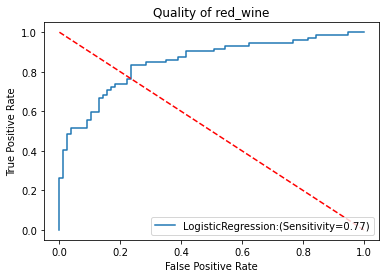

In [155]:
plt.figure()
plt.plot(fpr,tpr,label='LogisticRegression:(Sensitivity=%0.2f)'%logit_roc_auc1)
plt.plot([0,1],[1,0],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Quality of red_wine')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

## Saving the model

In [156]:
import joblib
joblib.dump(gcv,"Insurance-claim-fraud-detection-project.pkl")

['Insurance-claim-fraud-detection-project.pkl']

## Load the saved model

In [157]:
model=joblib.load('Insurance-claim-fraud-detection-project.pkl')

In [158]:
pred=model.predict(x_test)

In [159]:
print("accuracy score:",accuracy_score(y_test,gcv_pred))

accuracy score: 0.7718120805369127
